X_1 and X_2 graph. support vectors are the two on opposite sides closest to the supporting hyperplane.

Supporting hyperplane = 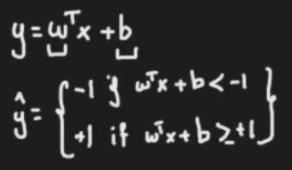
where unkowns are w and b

# Hard Margin

hard margin: classifiying without accepting outliers

min cost function: 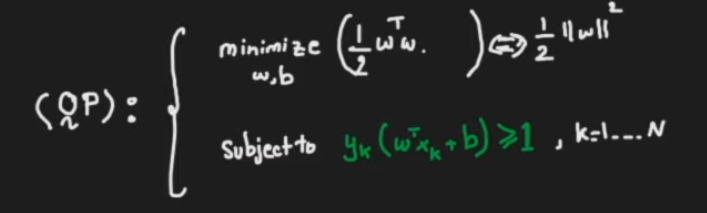

w is the gradient. minimize w by increasing margin: 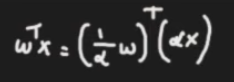

Langrangian function of the cost function: 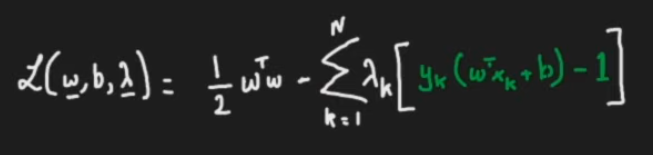 take the partial deriv

kkt conditions: 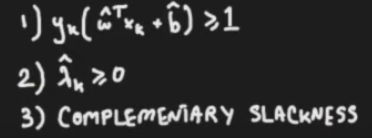



In [1]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/ines/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] #petal length and width
y = iris['target']

In [3]:
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [4]:
svm = SVC(kernel = 'linear', C = float('inf')) #inf bc hard margin
svm.fit(X, y)

SVC(C=inf, kernel='linear')

In [5]:
x0 = np.linspace(0,5.5,200)

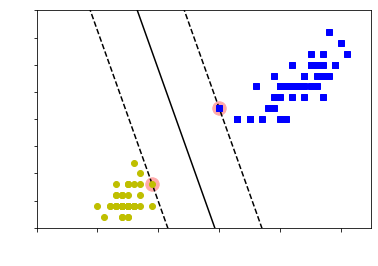

In [6]:
def plot_svc_dec_bound(svm, xmin, xmax):
    w = svm.coef_[0]
    b = svm.intercept_[0]
    
    x0 = np.linspace(xmin, xmax, 200)
    dec_bound = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    upper_marg = dec_bound + margin
    lower_marg = dec_bound - margin
    
    supportVector = svm.support_vectors_
    plt.scatter(supportVector[:,0],supportVector[:,1], s = 180, facecolors = '#FFAAAA')
    plt.plot(x0, dec_bound, 'k-')
    plt.plot(x0, upper_marg, 'k--')
    plt.plot(x0, lower_marg, 'k--')

plt.figure()
plot_svc_dec_bound(svm = svm, xmin = 0, xmax = 5.5)
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo')
plt.xlabel('length', color = 'w')
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.axis([0, 5.5, 0, 2])
plt.show()

In [7]:
X_outliers = np.array([[3.4, 1.3], [3.2, .8]])
y_outliers = np.array([0,0])

In [8]:
Xo1 = np.concatenate([X, X_outliers[:1]], axis = 0)
yo1 = np.concatenate([y, y_outliers[:1]], axis = 0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis = 0)
Xo2 = np.concatenate([y, y_outliers[1:]], axis = 0)

In [ ]:
svm_1 = SVC(kernel='linear', C = float("inf"))
svm_1.fit(Xo1, yo1)
svm_2 = SVC(kernel='linear', C = float("inf"))
svm_2.fit(Xo2, yo2)

plt.figure(figsize =(12,3))
plt.subplot(121)
plt.plot(Xo1[:,0][yo1==1], Xo1[:,1][yo1==1], 'bs')
plt.plot(Xo1[:,0][yo1==0], Xo1[:,1][yo1==0], 'yo')
plot_svc_dec_bound(svm_1, 0, 5.5)
plt.annotate('outliers', xy = (X_outliers[0][0], X_outliers[0][1]), ha = 'center', fontsize= 16, xytext = (2.5, 1.7), arrowprops = dict(facecolor = 'black', shrink = .1))
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:,0][yo2==1], Xo2[:,1][yo2==1], 'bs')
plt.plot(Xo2[:,0][yo2==0], Xo2[:,1][yo2==0], 'yo')
plot_svc_dec_bound(svm_2, 0, 5.5)
plt.annotate('outliers', xy = (X_outliers[1][0], X_outliers[1][1]), ha = 'center', fontsize= 16, xytext = (2.5, 1.7), arrowprops = dict(facecolor = 'black', shrink = .1))
plt.axis([0, 5.5, 0, 2])
plt.show()

# soft

In [37]:
from sklearn.pipeline import Pipeline

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [38]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svm_1 = LinearSVC(C = 1, loss = 'hinge', random_state = 42)
svm_2 = LinearSVC(C = 100, loss = 'hinge', random_state = 42)

scaled_svm_1 = Pipeline([
    ('scaler', scaler),
    ('linear svc', svm_1),
])

scaled_svm_2 = Pipeline([
    ('scaler', scaler),
    ('linear svc', svm_2),
])

scaled_svm_1.fit(X, y)
scaled_svm_2.fit(X, y)

/home/ines/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

(4.0, 5.9, 0.8, 2.8)

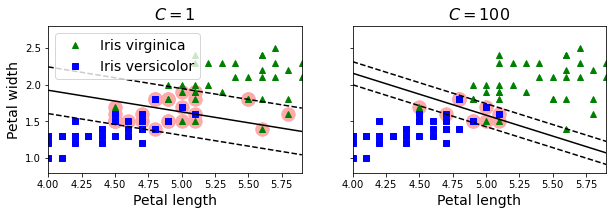

In [39]:
#convert to unscaled param
b1 = svm_1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_1.coef_[0] / scaler.scale_
w2 = svm_2.coef_[0] / scaler.scale_
svm_1.intercept_ = np.array([b1])
svm_2.intercept_ = np.array([b2])
svm_1.coef_ = np.array([w1])
svm_2.coef_ = np.array([w2])

#find support vector
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_1.support_vectors_ = X[support_vectors_idx1]
svm_2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_dec_bound(svm_1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14, color = 'w')
plt.ylabel("Petal width", fontsize=14, color = 'w')
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])
plt.xticks(color = 'w')
plt.yticks(color = 'w')

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_dec_bound(svm_2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14, color = 'w')
plt.title("$C = {}$".format(svm_2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])
plt.xticks(color = 'w')
plt.yticks(color = 'w')